In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
process_out_path = Path("./outputs")
incident_solid = np.load(process_out_path / f"incident_ml_ready_solid.npz")["arr_0"]
outgoing_solid = np.load(process_out_path / f"outgoing_ml_ready_solid.npz")["arr_0"]
incident_fluid = np.load(process_out_path / f"incident_ml_ready_fluid.npz")["arr_0"]
outgoing_fluid = np.load(process_out_path / f"outgoing_ml_ready_fluid.npz")["arr_0"]

In [3]:
# Read grid
times = np.loadtxt(process_out_path / "incident_ml_ready_solid_times.txt")
depth_solid = np.loadtxt(process_out_path / f"grid_depth_ml_ready_solid.txt")
depth_fluid = np.loadtxt(process_out_path / f"grid_depth_ml_ready_fluid.txt")
theta = np.loadtxt(process_out_path / f"grid_dist_ml_ready.txt")
phi = np.loadtxt(process_out_path / f"grid_azim_ml_ready.txt")

In [4]:
def select_m_points(n, m):
    return np.round(np.linspace(0, n - 1, m)).astype(int)
    
# Extract data
n_time_show = 8
n_depth_show = 3
time_idx = select_m_points(len(times), n_time_show)
depth_solid_idx = select_m_points(len(depth_solid), n_depth_show)
depth_fluid_idx = select_m_points(len(depth_fluid), n_depth_show)

# Waves
channel = 2
incident_solid_plot = incident_solid[time_idx, channel][:, depth_solid_idx]
outgoing_solid_plot = outgoing_solid[time_idx, channel][:, depth_solid_idx]
incident_fluid_plot = incident_fluid[time_idx, channel][:, depth_fluid_idx]
outgoing_fluid_plot = outgoing_fluid[time_idx, channel][:, depth_fluid_idx]
depth_solid_plot = depth_solid[depth_solid_idx]
depth_fluid_plot = depth_fluid[depth_fluid_idx]
v_min_solid, v_max_solid = incident_solid_plot.min(), incident_solid_plot.max()
v_min_fluid, v_max_fluid = incident_fluid_plot.min(), incident_fluid_plot.max()

In [5]:
def plot(wave, depth, v_min, v_max, title, cmap="berlin"):
    # Append 2*pi to phi
    wave_ = np.concatenate((wave, wave[..., 0:1]), axis=-1)
    phi_ = np.concatenate((phi, [2 * np.pi]), axis=0)
    fig, ax = plt.subplots(wave.shape[1], wave.shape[0], dpi=200,
                           subplot_kw={'projection': 'polar'}, 
                           figsize=(wave.shape[0], wave.shape[1]))
    for i in range(wave_.shape[1]):
        for j in range(wave_.shape[0]):
            ax[i, j].pcolormesh(phi_, theta,
                                wave_[j, i, :, :], shading='gouraud', cmap=cmap,
                                vmin=v_min, vmax=v_max)
            ax[i, j].axis("off")
            if i == wave_.shape[1] - 1:
                ax[i, j].text(0.5, -0.1, f"t={times[time_idx[j]]:.1f}", 
                              ha="center", va="top", 
                              fontsize=6, transform=ax[i, j].transAxes)
            if j == 0:
                ax[i, j].text(-0.1, 0.5, f"d={depth[i]:.1f}", 
                              ha="right", va="center", 
                              fontsize=6, transform=ax[i, j].transAxes)
    fig.suptitle(title)
    plt.show()

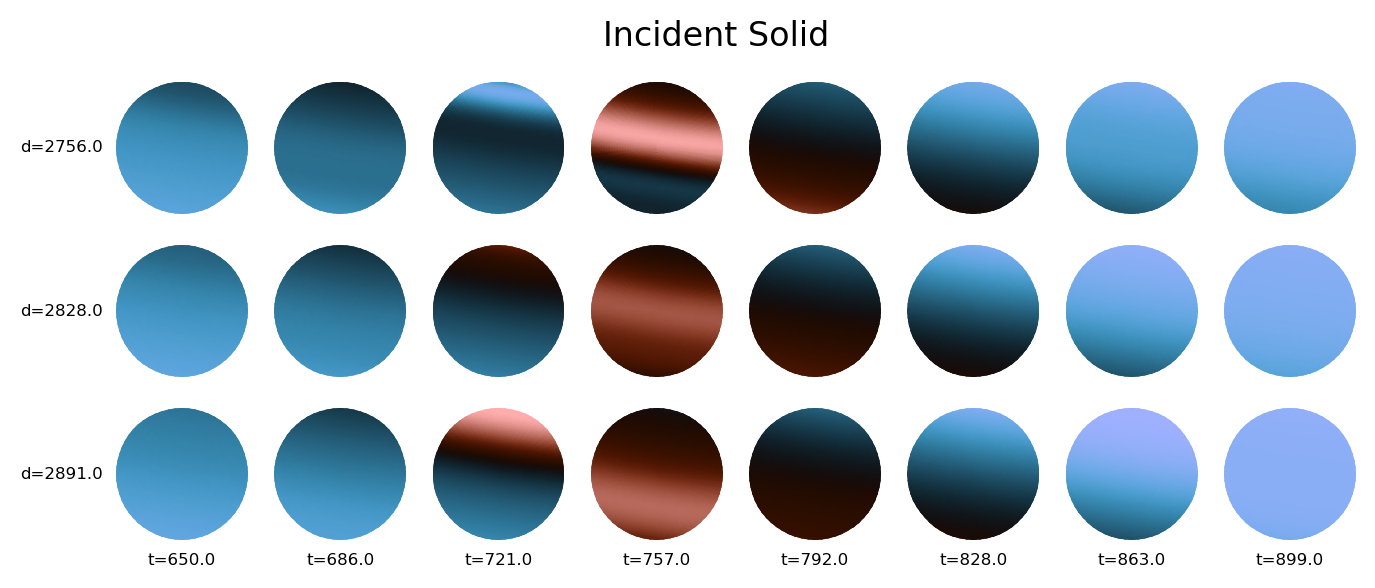

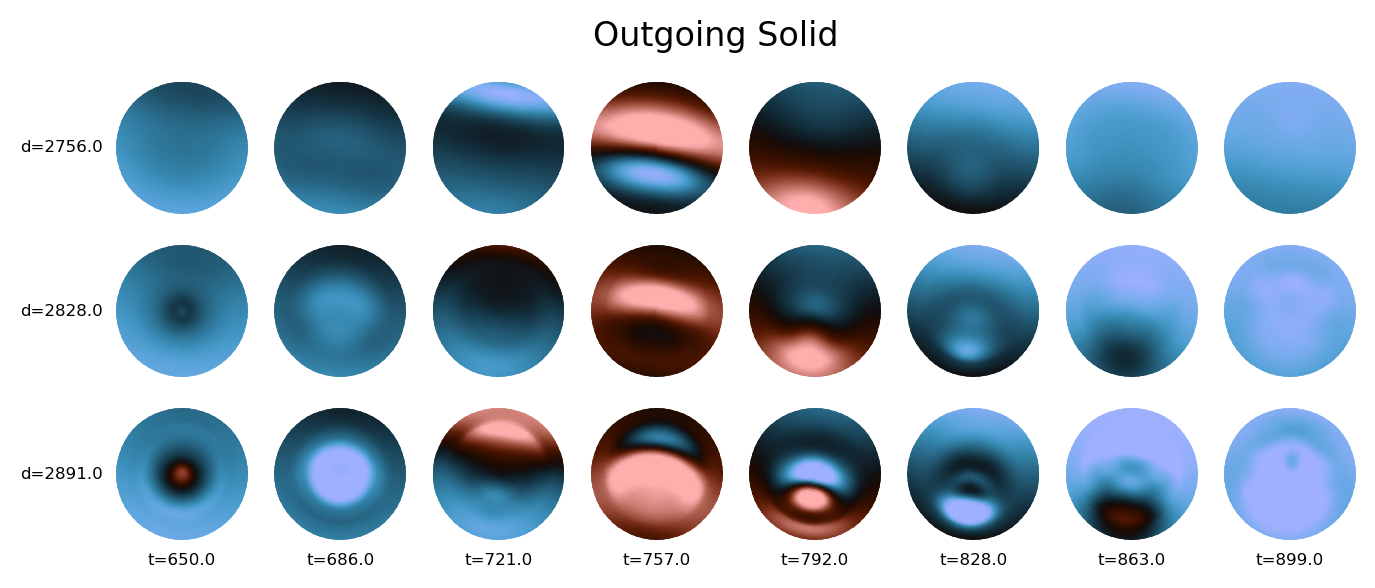

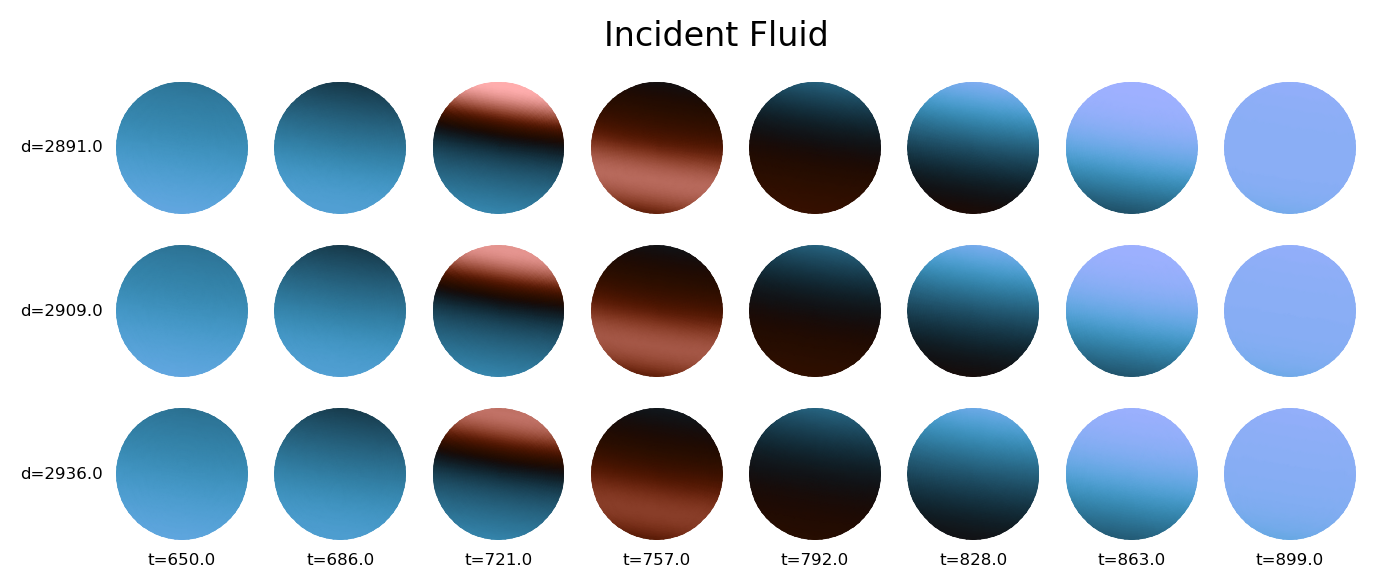

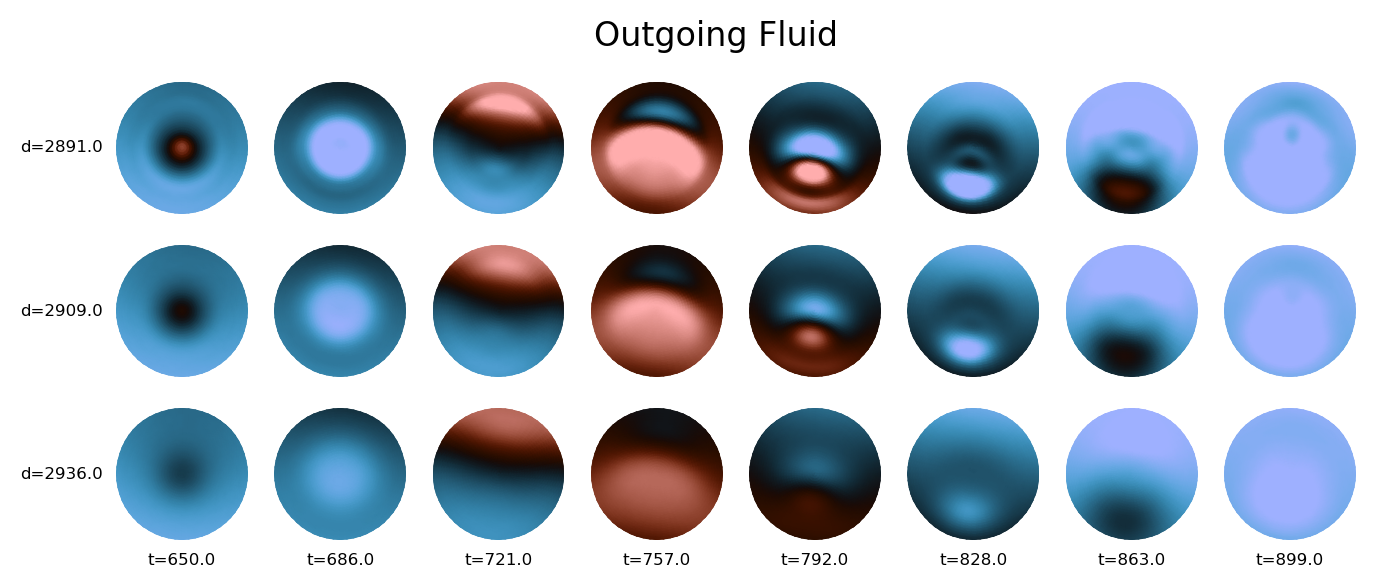

In [6]:
plot(incident_solid_plot, depth_solid_plot, v_min_solid, v_max_solid, "Incident Solid")
plot(outgoing_solid_plot, depth_solid_plot, v_min_solid, v_max_solid, "Outgoing Solid")
plot(incident_fluid_plot, depth_fluid_plot, v_min_fluid, v_max_fluid, "Incident Fluid")
plot(outgoing_fluid_plot, depth_fluid_plot, v_min_fluid, v_max_fluid, "Outgoing Fluid")